<a href="https://colab.research.google.com/github/justinzhao07/IndustrialAI/blob/main/MechanicalGearVibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Exploration**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

Read in data from https://www.kaggle.com/datasets/hieudaotrung/gear-vibration

In [2]:
eccentricity = pd.read_csv('/content/eccentricity.csv')
missing_tooth = pd.read_csv('/content/missing_tooth.csv')
no_fault = pd.read_csv('/content/no_fault.csv')
root_crack = pd.read_csv('/content/root_crack.csv')
surface_fault = pd.read_csv('/content/surface_fault.csv')
tooth_chipped_fault = pd.read_csv('/content/tooth_chipped_fault.csv')

Plot vibration timeseries for gear with eccentricity fault

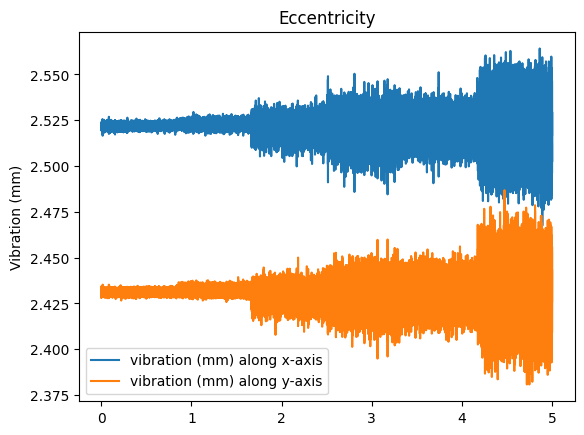

In [3]:
sensor1 = eccentricity['sensor1']
sensor2 = eccentricity['sensor2']
time = np.linspace(0., 5., 150000)

# Plot using matplotlib
plt.plot(time, sensor1, label='vibration (mm) along x-axis')
plt.plot(time, sensor2, label='vibration (mm) along y-axis')
plt.ylabel('Vibration (mm)')
plt.title('Eccentricity')
plt.legend()
plt.show()

Split data based on speed and load.

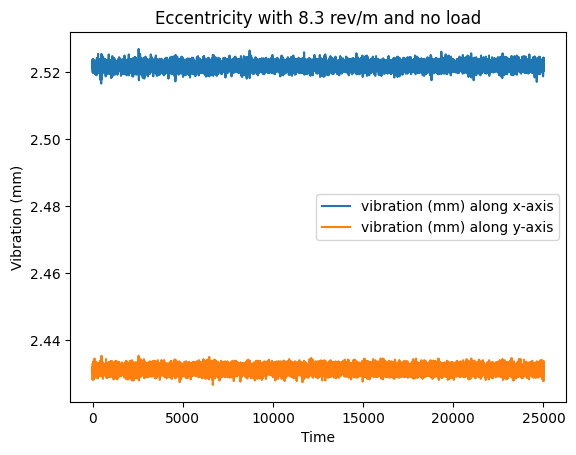

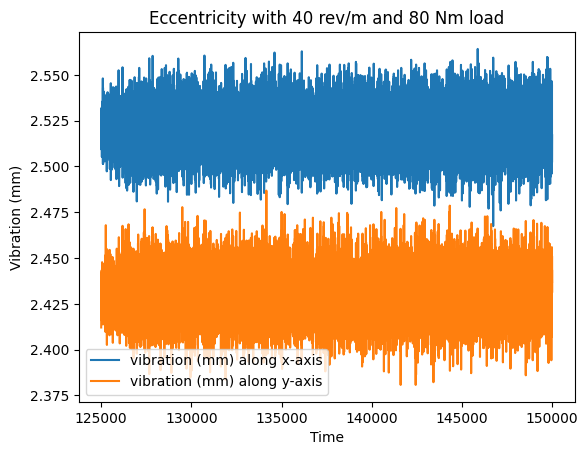

In [4]:
sensor1_speed8_noload = eccentricity['sensor1'][1:25001]
sensor1_speed8_load = eccentricity['sensor1'][25002:50001]
sensor1_speed25_noload = eccentricity['sensor1'][50002:75001]
sensor1_speed25_load = eccentricity['sensor1'][75002:100001]
sensor1_speed40_noload = eccentricity['sensor1'][100002:125001]
sensor1_speed40_load = eccentricity['sensor1'][125002:]

sensor2_speed8_noload = eccentricity['sensor2'][1:25001]
sensor2_speed8_load = eccentricity['sensor2'][25002:50001]
sensor2_speed25_noload = eccentricity['sensor2'][50002:75001]
sensor2_speed25_load = eccentricity['sensor2'][75002:100001]
sensor2_speed40_noload = eccentricity['sensor2'][100002:125001]
sensor2_speed40_load = eccentricity['sensor2'][125002:]

plt.plot(sensor1_speed8_noload, label='vibration (mm) along x-axis')
plt.plot(sensor2_speed8_noload, label='vibration (mm) along y-axis')
plt.xlabel('Time')
plt.ylabel('Vibration (mm)')
plt.title('Eccentricity with 8.3 rev/m and no load')
plt.legend()
plt.show()

plt.plot(sensor1_speed40_load, label='vibration (mm) along x-axis')
plt.plot(sensor2_speed40_load, label='vibration (mm) along y-axis')
plt.xlabel('Time')
plt.ylabel('Vibration (mm)')
plt.title('Eccentricity with 40 rev/m and 80 Nm load')
plt.legend()
plt.show()

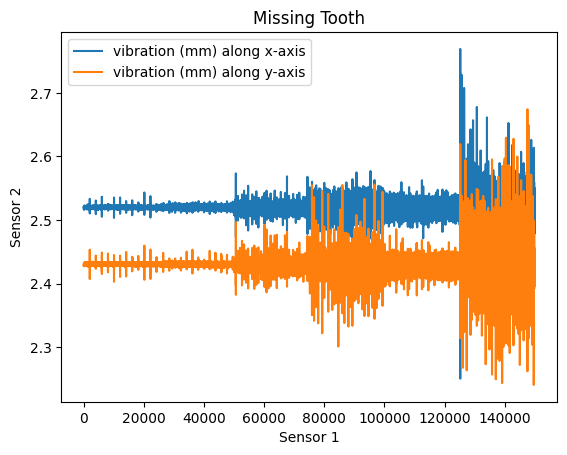

In [5]:
sensor1 = missing_tooth['sensor1']
sensor2 = missing_tooth['sensor2']

plt.plot(sensor1, label='vibration (mm) along x-axis')
plt.plot(sensor2, label='vibration (mm) along y-axis')


plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Missing Tooth')
plt.legend()
plt.show()

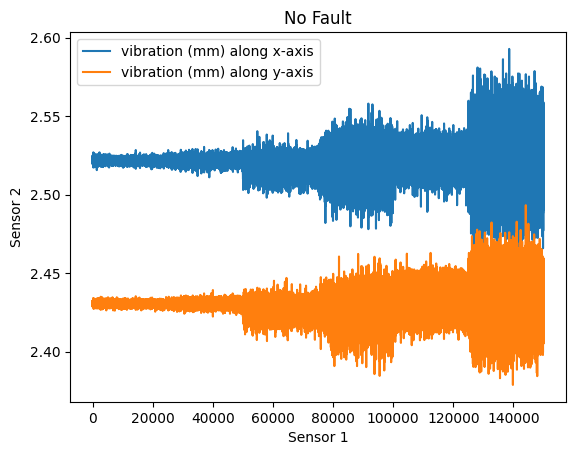

In [6]:
sensor1 = no_fault['sensor1']
sensor2 = no_fault['sensor2']

plt.plot(sensor1, label='vibration (mm) along x-axis')
plt.plot(sensor2, label='vibration (mm) along y-axis')


plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('No Fault')
plt.legend()
plt.show()

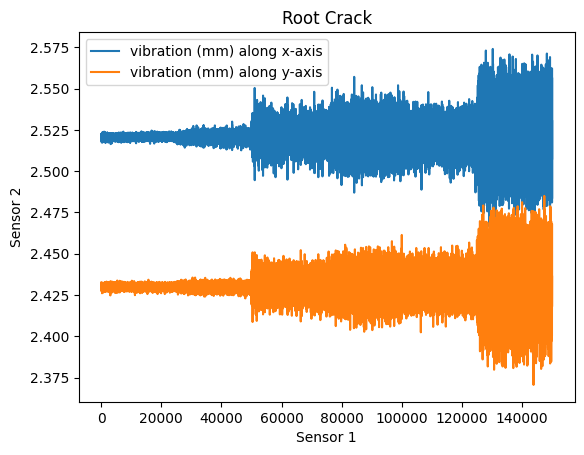

In [7]:
sensor1 = root_crack['sensor1']
sensor2 = root_crack['sensor2']

plt.plot(sensor1, label='vibration (mm) along x-axis')
plt.plot(sensor2, label='vibration (mm) along y-axis')


plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Root Crack')
plt.legend()
plt.show()

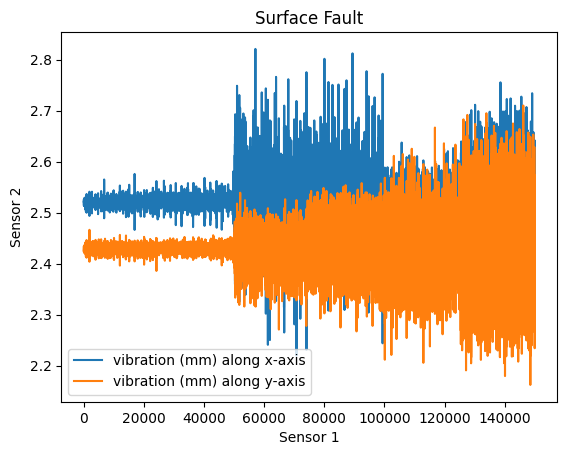

In [8]:
sensor1 = surface_fault['sensor1']
sensor2 = surface_fault['sensor2']

plt.plot(sensor1, label='vibration (mm) along x-axis')
plt.plot(sensor2, label='vibration (mm) along y-axis')


plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Surface Fault')
plt.legend()
plt.show()

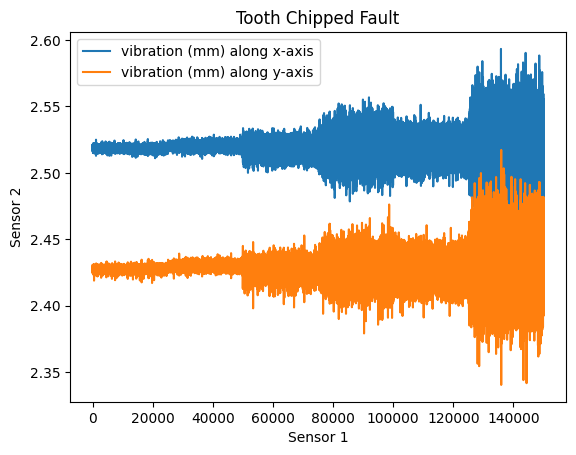

In [9]:
sensor1 = tooth_chipped_fault['sensor1']
sensor2 = tooth_chipped_fault['sensor2']

plt.plot(sensor1, label='vibration (mm) along x-axis')
plt.plot(sensor2, label='vibration (mm) along y-axis')


plt.xlabel('Sensor 1')
plt.ylabel('Sensor 2')
plt.title('Tooth Chipped Fault')
plt.legend()
plt.show()

AI Model Training - (LSTM)

In [17]:
# Data processing
e1 = eccentricity[['sensor1', 'sensor2']]
e2 = e1[125002:150000]
e3 = e2.values.astype(float)
e3[:, 1] =  1

m1 = missing_tooth[['sensor1', 'sensor2']]
m2 = m1[125002:150000]
m3 = m2.values.astype(float)
m3[:, 1] =  2

n1 = no_fault[['sensor1', 'sensor2']]
n2 = n1[125002:150000]
n3 = n2.values.astype(float)
n3[:, 1] =  0

r1 = root_crack[['sensor1', 'sensor2']]
r2 = r1[125002:150000]
r3 = r2.values.astype(float)
r3[:, 1] =  3

s1 = surface_fault[['sensor1', 'sensor2']]
s2 = s1[125002:150000]
s3 = s2.values.astype(float)
s3[:, 1] =  4

t1 = tooth_chipped_fault[['sensor1', 'sensor2']]
t2 = t1[125002:150000]
t3 = t2.values.astype(float)
t3[:, 1] =  5

array1 = np.vstack((e3, m3))
array2 = np.vstack((array1, n3))
array3 = np.vstack((array2, r3))
array4 = np.vstack((array3, s3))
stacked_array = np.vstack((array3, t3))
indices = np.arange(stacked_array.shape[0])  # Get array of indices
np.random.shuffle(indices)            # Shuffle the indices
# Use shuffled indices to rearrange rows in the array
shuffled_array = stacked_array[indices]

X = shuffled_array[:, 0].reshape(-1, 1)  # Time series data (reshape to 2D array)
y = shuffled_array[:, 1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    LSTM(64, input_shape=(1, 1)),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')  # 5 output units for 5 labels
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model (using example test data)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
2500/2500 [==============================] - 13s 4ms/step - loss: 1.6169 - accuracy: 0.2019 - val_loss: 1.6104 - val_accuracy: 0.2025
Epoch 2/10
2500/2500 [==============================] - 10s 4ms/step - loss: 1.6109 - accuracy: 0.2003 - val_loss: 1.6098 - val_accuracy: 0.1992
Epoch 3/10
2500/2500 [==============================] - 9s 4ms/step - loss: 1.6104 - accuracy: 0.2004 - val_loss: 1.6100 - val_accuracy: 0.2018
Epoch 4/10
2500/2500 [==============================] - 11s 5ms/step - loss: 1.6102 - accuracy: 0.1981 - val_loss: 1.6098 - val_accuracy: 0.2018
Epoch 5/10
2500/2500 [==============================] - 11s 4ms/step - loss: 1.6100 - accuracy: 0.1995 - val_loss: 1.6098 - val_accuracy: 0.1950
Epoch 6/10
2500/2500 [==============================] - 10s 4ms/step - loss: 1.6098 - accuracy: 0.1997 - val_loss: 1.6097 - val_accuracy: 0.2018
Epoch 7/10
2500/2500 [==============================] - 11s 4ms/step - loss: 1.6097 - accuracy: 0.1979 - val_loss: 1.6101 - val_acc